1. Carga y Exploración de Datos:

In [ ]:
# Se cargan las bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor


In [ ]:
import pandas as pd
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Boston.csv')

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.61,8.60,0.01,0.08,0.26,3.68,88.98
ZN,506.0,11.36,23.32,0.00,0.00,0.00,12.50,100.00
INDUS,506.0,11.14,6.86,0.46,5.19,9.69,18.10,27.74
CHAS,506.0,0.07,0.25,0.00,0.00,0.00,0.00,1.00
NX,506.0,0.55,0.12,0.38,0.45,0.54,0.62,0.87
RM,506.0,6.28,0.70,3.56,5.89,6.21,6.62,8.78
AGE,506.0,68.57,28.15,2.90,45.02,77.50,94.07,100.00
DIS,506.0,3.80,2.11,1.13,2.10,3.21,5.19,12.13
RAD,506.0,9.55,8.71,1.00,4.00,5.00,24.00,24.00
TAX,506.0,408.24,168.54,187.00,279.00,330.00,666.00,711.00


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
df.isna().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


2. Preprocesamiento:

In [ ]:
df["CRIM"].value_counts()

,count
CRIM,
0.01501,2
14.33370,2
0.03466,1
0.05083,1
0.03738,1
...,...
1.27346,1
1.42502,1
1.34284,1


In [ ]:
df["ZN"].value_counts()

,count
ZN,
0.0,372
20.0,21
80.0,15
22.0,10
25.0,10
12.5,10
40.0,7
30.0,6
45.0,6


In [ ]:
df[df["ZN"] == 0.0]

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


Se encuentran 372 filas en columna ZN de 505 con 0, Se decide dropearla

In [ ]:
df.drop(columns="ZN", inplace=True )

In [ ]:
df["CHAS"].value_counts()

,count
CHAS,
0,471
1,35


In [ ]:
df["INDUS"].value_counts()

,count
INDUS,
18.10,132
19.58,30
8.14,22
6.20,18
21.89,15
...,...
2.25,1
2.01,1
4.15,1


In [ ]:
df["NX"].value_counts()

,count
NX,
0.538,23
0.713,18
0.437,17
0.871,16
0.624,15
...,...
0.422,1
0.389,1
0.385,1


In [ ]:
df["RM"].value_counts()

,count
RM,
6.229,3
6.127,3
5.713,3
6.417,3
6.405,3
...,...
6.484,1
6.242,1
6.674,1


In [ ]:
df["AGE"].value_counts()

,count
AGE,
100.0,43
87.9,4
97.9,4
98.8,4
96.0,4
...,...
85.9,1
66.6,1
54.2,1


In [ ]:
df["DIS"].value_counts()

,count
DIS,
3.4952,5
6.8147,4
5.2873,4
5.4007,4
5.7209,4
...,...
1.7984,1
1.7659,1
1.7573,1


In [ ]:
df["RAD"].value_counts()

,count
RAD,
24,132
5,115
4,110
3,38
6,26
8,24
2,24
1,20
7,17


In [ ]:
df["TAX"].value_counts()

,count
TAX,
666.0,132
307.0,40
403.0,30
437.0,15
304.0,14
...,...
244.0,1
280.0,1
351.0,1


In [ ]:
df["PTRATIO"].value_counts()

,count
PTRATIO,
20.2,140
14.7,34
21.0,27
17.8,23
19.2,19
17.4,18
19.1,17
18.6,17
18.4,16


In [ ]:
df["B"].value_counts()

,count
B,
396.90,121
393.74,3
395.24,3
394.72,2
392.80,2
...,...
364.31,1
353.89,1
363.43,1


In [ ]:
df["LSTAT"].value_counts()

,count
LSTAT,
6.36,3
18.13,3
8.05,3
7.79,3
14.10,3
...,...
15.79,1
12.12,1
13.28,1


In [ ]:
df["MEDV"].value_counts()

,count
MEDV,
50.0,16
25.0,8
23.1,7
22.0,7
21.7,7
...,...
12.6,1
16.4,1
17.7,1


#### No se encontraron valores nulos

In [ ]:
df.columns = df.columns.str.lower().str.strip()

#### Identificar y tratar outliers.

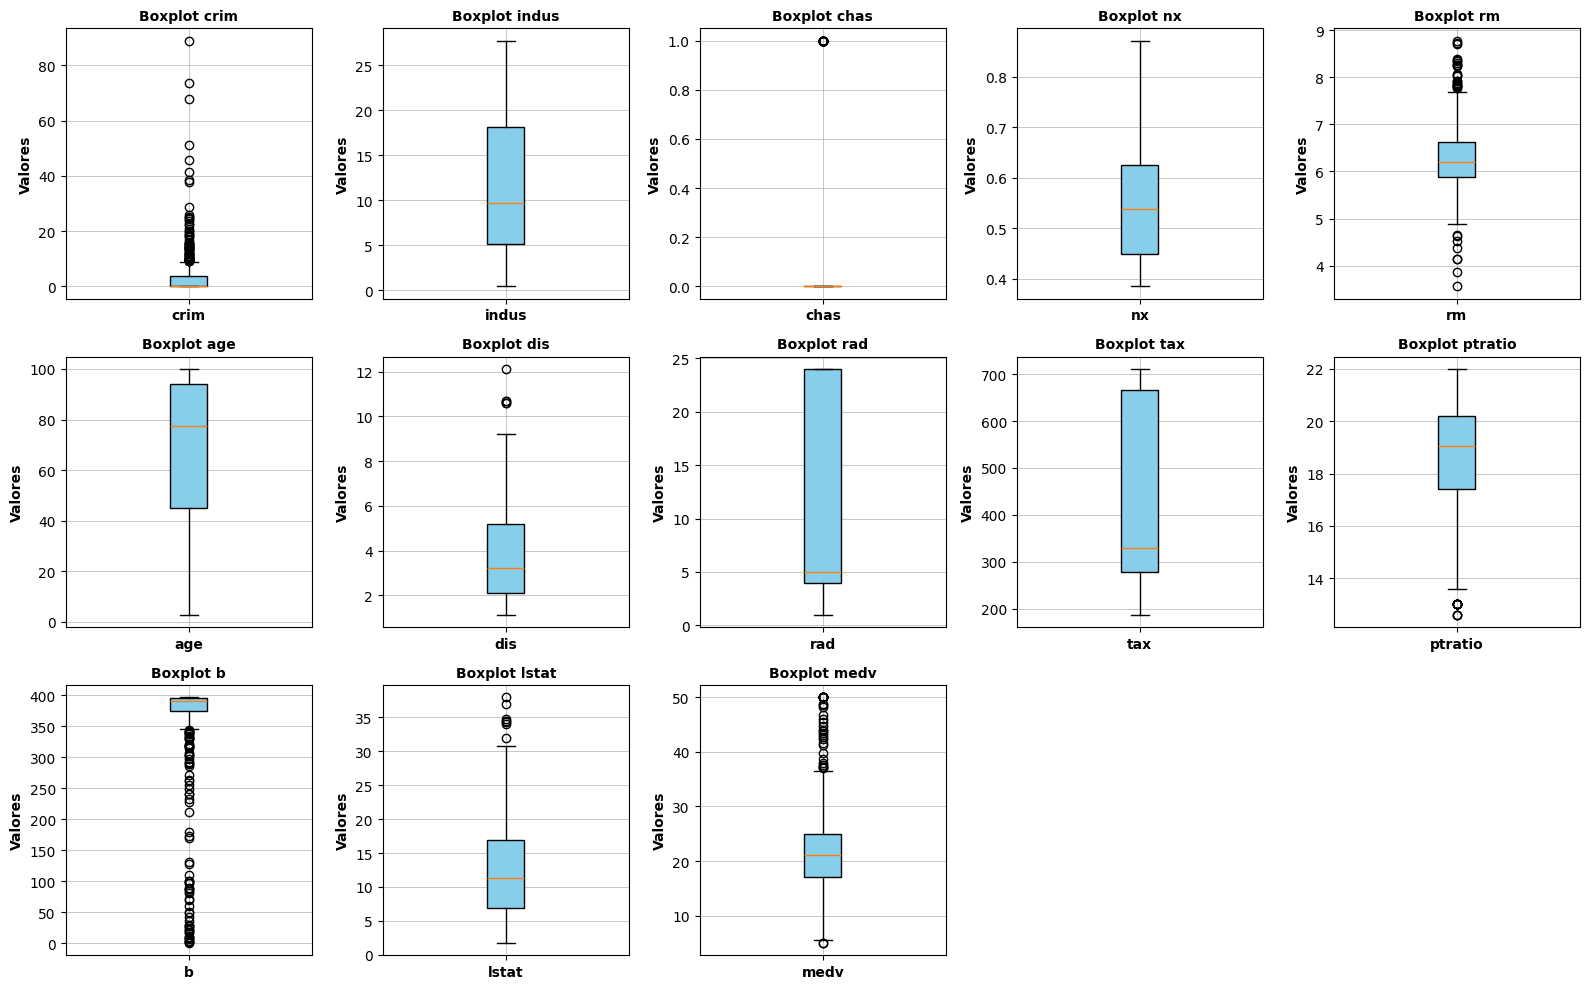

In [ ]:
# # Crear la figura y los subplots.
fig, axs = plt.subplots(3,5, figsize=(16, 10))
# Se deja el array en una dimension para no usar indices con dos dimensiones
axs = axs.flatten()
# Columnas numéricas a graficar
numerical_cols = num_colum = df.columns.tolist()
# Boxplot para las columnas numéricas
prop_caja = dict(facecolor='skyblue')
for i, col in enumerate(numerical_cols[:15]):
  axs[i].boxplot(df[col], patch_artist=True, boxprops=prop_caja)
  axs[i].set_title(f"Boxplot {col}", fontsize=10, fontweight='bold')
  axs[i].set_xticklabels([col], fontweight='bold')
  axs[i].set_ylabel("Valores", fontweight='bold')
  axs[i].grid(True, linewidth=0.5)
axs[13].axis('off')
axs[14].axis('off')


plt.tight_layout()
plt.show()

#### En columna crim los outliers estan en su mayoria agrupados en el rango de 10 a 80 y más.
#### En la columna indus no hay outliers.
#### En columna chas esta la mayoria en el valor 1, por lo tanto no se tomara en cuenta.
#### En la columna nx no hay outliers.
#### En la columna rm los outliers estan agrupados en el rango de 0 a 5 y en el rango de 8 a 9.
#### En la columna age no hay outliers.
#### En la columna dis hay pocos outliers en el rango de 10 a 12.
#### En la columna rad no hay outliers.
#### En la columna rad no hay outliers.
#### En la columna tax no hay outliers.
#### En la columna ptratio hay dos outliers baj el valor 14.
#### En la columna b hay desmasiado outliers en el rango de valores de 0 a 350.
#### En la columna lstat hay outliers en el rango de valores de 30 y más.
#### En la columna medv los outliers estan en el rango de valores de 40 hacia arriba.

Analizar la correlación entre variables.

#### Se dejara de lado las columna chas. por la desproporcionalidad de los valores.

In [ ]:
# Se reviza los datos con la correlaciones de Pearson

df_numericas = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = df_numericas.corr(method='pearson')
print(correlation_matrix)

             crim     indus      chas        nx        rm       age       dis  \
crim     1.000000  0.406583 -0.055892  0.420972 -0.219247  0.352734 -0.379670   
indus    0.406583  1.000000  0.062938  0.763651 -0.391676  0.644779 -0.708027   
chas    -0.055892  0.062938  1.000000  0.091203  0.091251  0.086518 -0.099176   
nx       0.420972  0.763651  0.091203  1.000000 -0.302188  0.731470 -0.769230   
rm      -0.219247 -0.391676  0.091251 -0.302188  1.000000 -0.240265  0.205246   
age      0.352734  0.644779  0.086518  0.731470 -0.240265  1.000000 -0.747881   
dis     -0.379670 -0.708027 -0.099176 -0.769230  0.205246 -0.747881  1.000000   
rad      0.625505  0.595129 -0.007368  0.611441 -0.209847  0.456022 -0.494588   
tax      0.582764  0.720760 -0.035587  0.668023 -0.292048  0.506456 -0.534432   
ptratio  0.289946  0.383248 -0.121515  0.188933 -0.355501  0.261515 -0.232471   
b       -0.385064 -0.356977  0.048788 -0.380051  0.128069 -0.273534  0.291512   
lstat    0.455621  0.603800 

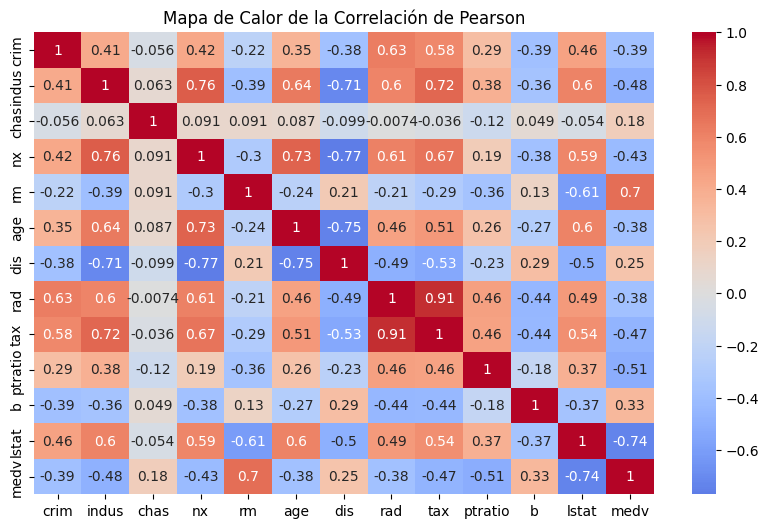

In [ ]:
# Se Crea el  mapas de calor
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()

#### Correlaciones fuertes:
#### La variable crim esta correlacionada con indus en 0.41, con nx en 0.42, con rad en 0.63, con tax en 0.58, con lstat en 0.46.
#### La variable indus esta correlacionada con nx en 0.76, con age en 0.64, con rad en 0.6, con tax en 0.72, con lstat en 0.6.
#### la variable nx esta correlacionada con age en 0.73, con rad en 0.61, con tax en 0.67, con lstat en 0.59.
#### La variable rm esta correlacionada con medv en 0.7.
#### La variable age esta correlacionada con rad en 0.46, con tax en 0.51.
#### La variable rad esta correlacionada con indus en 0.6, con ptratio en 0.46, con istat en 0.49.
#### La variable tax esta correlacionada con lstat en 0.54.
#### La variable ptratio esta correlacionada con crim en 0.3, con tax en 0.46.
#### La variable lstat esta correlacionada con age en 0.6.


#### Correlaciones debiles

#### la columna crim esta correlacionada con age en 0.35, con ptratio en 0.29.
#### LA columna indus esta correlacionada con ptratio en 0.38.
#### La columna chas esta correlacinada con medv en 0.18.
#### La columna rm esta correlacionada con dis en 0.21, con b en 0.13.
#### La columna age con crime en 0.35. con ptratio en 0.26.
#### La columna dis con rm en 0.21, con b en 0.29, con medv en 0.25.
#### La columna ptratio con nx en 0.19, con lstat en 0.37.
#### La columna b esta correlacinada con medv en 0.33.



#### Ralizado el analisis de outliers y de correlación. Se deduce de las correlaciones que la columa medv, no esta fuertemente correlacionada con el resto de caracteristicas. Ademas las columna b y chas, no tienen correlaciones significativas con el resto de caracteristicas y presentan una desproporcion en los datos con demasiados outliers. Pro lo tanto se dejaran fuera del preprocesamiento y modelado.

In [ ]:
df.drop(columns="chas", inplace=True )
df.drop(columns="b", inplace=True)

Preprocesamiento:

In [ ]:
# Selección de caracteristicas
num_cols = ['crim', 'indus', 'nx', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat']


In [ ]:
X = df.drop(columns='medv')
y = df['medv']

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba con variables numéricas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Modelos de Regresión:

In [ ]:
# Se define transformadores.
num_transformer = Pipeline(steps=[
         ('scaler', StandardScaler())
        ])

# Se combina transformadores
preprocessor = ColumnTransformer(transformers=[
        ('num', num_transformer, num_cols),
         ])

# Se integra un pipeline
pipeline = Pipeline(steps=[
       ('preprocessor', preprocessor),
       ('model', LinearRegression())
])

In [ ]:
# Se entrena el modelo de regresion lineal
pipeline.fit(X_train, y_train)

# Realizar predicciones
y_pred_lr = pipeline.predict(X_test)



Linear Regression
Error Cuadrático Medio: 24.353837312255195
R-cuadrado: 0.6679042555460064


In [ ]:
# Evaluar el modelo
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'\nLinear Regression')
print(f'Error Cuadrático Medio: {mse_lr}')
print(f'R-cuadrado: {r2_lr}')


#### KNN: Entrenar un modelo KNN con un valor de K=5 y evaluar su rendimiento.

In [ ]:
# Preprocesador knn.
preprocessor_knn = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_cols)
])

# Modelo.
pipeline_knn = Pipeline([
    ("preprocessing_knn", preprocessor_knn),
    ("model_knn", KNeighborsRegressor(n_neighbors=5))
])

In [ ]:
# Entrenamiento.
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessing_knn',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['crim', 'indus', 'nx', 'rm',
                                                   'age', 'dis', 'rad', 'tax',
                                                   'ptratio', 'lstat'])])),
                ('model_knn', KNeighborsRegressor())])

In [ ]:
# Prediccion.
y_pred_knn = pipeline_knn.predict(X_test)

In [ ]:
# Evaluación
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_score_knn = r2_score(y_test, y_pred_knn)
print(f'\nKNeighborsRegressor')
print(f'Error Cuadrático Medio: {mse_knn}')
print(f'R-cuadrado: {r2_score_knn}')


KNeighborsRegressor
Error Cuadrático Medio: 9.756803921568627
R-cuadrado: 0.8669534899046702


#### Árbol de Decisión: Entrenar un modelo de árbol de decisión y evaluar su rendimiento.

In [ ]:
# Preprocesador Arbol de decisión.
preprocessor_tree = ColumnTransformer(transformers=[
    ("num", 'passthrough', num_cols)
])

# Modelo Arbol decisión.
pipeline_tree = Pipeline([
    ("pp_tree", preprocessor_tree),
    ("modelotree", DecisionTreeRegressor())
])

In [ ]:
# Entrenamiento.
pipeline_tree.fit(X_train, y_train)

Pipeline(steps=[('pp_tree',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['crim', 'indus', 'nx', 'rm',
                                                   'age', 'dis', 'rad', 'tax',
                                                   'ptratio', 'lstat'])])),
                ('modelotree', DecisionTreeRegressor())])

In [ ]:
c

In [ ]:
# Evaluación
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_score_tree = r2_score(y_test, y_pred_tree)
print(f'\n DecisionTreeRegressor')
print(f'Error Cuadrático Medio: {mse_tree}')
print(f'R-cuadrado: {r2_score_tree}')


 DecisionTreeRegressor
Error Cuadrático Medio: 11.266960784313728
R-cuadrado: 0.8463605680934011


####  RandomForestRegressor: Entrenar un modelo RandomForestRegressor y evaluar su rendimiento.

In [ ]:
# Preprocesador Random forest.
preprocessor_forest = ColumnTransformer(transformers=[
    ("num", 'passthrough', num_cols)
])

# Modelo Randm forest.
pipeline_forest = Pipeline([
    ("pp_forest", preprocessor_forest),
    ("modeloforest", RandomForestRegressor())
])

In [ ]:
# Entrenamiento.
pipeline_forest.fit(X_train, y_train)

Pipeline(steps=[('pp_forest',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['crim', 'indus', 'nx', 'rm',
                                                   'age', 'dis', 'rad', 'tax',
                                                   'ptratio', 'lstat'])])),
                ('modeloforest', RandomForestRegressor())])

In [ ]:
# Prediccion.
y_pred_forest = pipeline_forest.predict(X_test)

In [ ]:
# Evaluación
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_score_forest = r2_score(y_test, y_pred_forest)
print(f'\nRandomForestRegressor')
print(f'Error Cuadrático Medio: {mse_forest}')
print(f'R-cuadrado: {r2_score_forest}')


RandomForestRegressor
Error Cuadrático Medio: 9.068479343137257
R-cuadrado: 0.8763396765810968


#### Benchmarking y Comparación de Modelos:

In [ ]:
print(f'\nLinear Regression')
print(f'Error Cuadrático Medio: {mse_lr:.3f}')
print(f'R-cuadrado: {r2_lr:.3f}')
print(f'\nKNeighborsRegressor')
print(f'Error Cuadrático Medio: {mse_knn:.3f}')
print(f'R-cuadrado: {r2_score_knn:.3f}')
print(f'\n DecisionTreeRegressor')
print(f'Error Cuadrático Medio: {mse_tree:.3f}')
print(f'R-cuadrado: {r2_score_tree:.3f}')
print(f'\nRandomForestRegressor')
print(f'Error Cuadrático Medio: {mse_forest:.3f}')
print(f'R-cuadrado: {r2_score_forest:.3f}')


Linear Regression
Error Cuadrático Medio: 24.354
R-cuadrado: 0.668

KNeighborsRegressor
Error Cuadrático Medio: 9.757
R-cuadrado: 0.867

 DecisionTreeRegressor
Error Cuadrático Medio: 11.267
R-cuadrado: 0.846

RandomForestRegressor
Error Cuadrático Medio: 9.068
R-cuadrado: 0.876


#### Segun los valores entregados por los cuatro modelos de regresión, el modelo que entrerago mejor rendimiento es el modelo Randomforest, con un error cuadratico de 8.392 y un 89% de predicción. Esto sucede, porque el random forest es un modelo ensamblado, que contiene modelos de arboles y le da una mayor eficiencia. El modelo entrego un menor error y una mayor precisión. Ahora se puede seguir mejorando la eficiencia del modelo, a traves de sus parametros.